In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon, Rectangle, Circle
import matplotlib.colors as mcolors
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

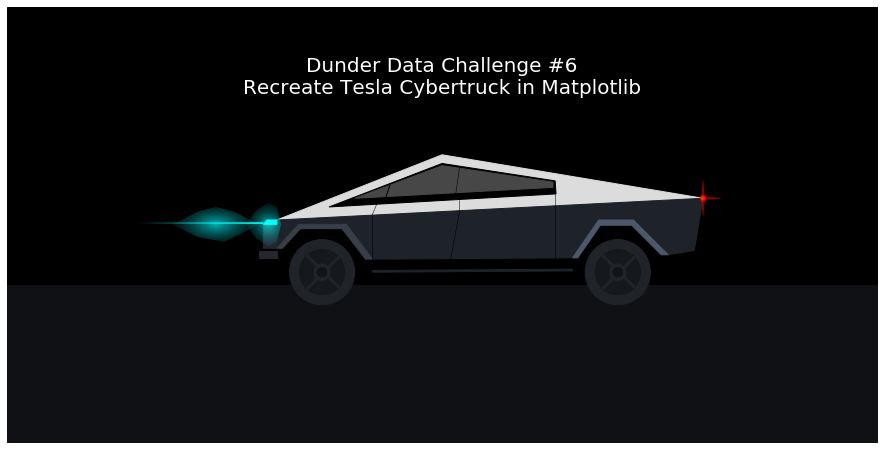

In [2]:
%matplotlib inline
fig = plt.figure(figsize=(16, 8))

def draw_car():
    fig.clear()
    ax = fig.add_subplot()
    ax.axis('off')
    ax.set_ylim(0, 1)
    ax.set_xlim(0, 2)
    ax.fill_between(x=[0, 2], y1=.36, y2=1, color='black')
    ax.fill_between(x=[0, 2], y1=0, y2=.36, color='#101115')
    ax.text(1, .8, 'Dunder Data Challenge #6\nRecreate Tesla Cybertruck in Matplotlib', 
            color='white', fontsize=20, ha='center')
    
    top = Polygon([[.62, .51], [1, .66], [1.6, .56]], color='#DCDCDC')
    windows = Polygon([[.74, .54], [1, .64], [1.26, .6], [1.262, .57]], color='black')
    windows_bottom = Polygon([[.8, .56], [1, .635], [1.255, .597], [1.255, .585]], color='#474747')
    base = Polygon([[.62, .51], [.62, .445], [.67, .5], [.78, .5], [.84, .42], [1.3, .423],
                   [1.36, .51], [1.44, .51], [1.52, .43], [1.58, .44], [1.6, .56]], color="#1E2329")
    left_rim = Polygon([[.62, .445], [.67, .5], [.78, .5], [.84, .42], [.824, .42], [.77, .49],
                        [.674, .49], [.633, .445]], color='#373E48')
    left_tire = Circle((.724, .39), radius=.075, color="#202328")
    right_rim = Polygon([[1.3, .423], [1.36, .51], [1.44, .51], [1.52, .43], 
                         [1.504, .43], [1.436, .498], [1.364, .498], [1.312, .423]], color='#4D586A')
    right_tire = Circle((1.404, .39), radius=.075, color="#202328")
    left_inner_tire = Circle((.724, .39), radius=.052, color="#15191C")
    right_inner_tire = Circle((1.404, .39), radius=.052, color="#15191C")
    left_spoke = Circle((.724, .39), radius=.019, color="#202328")
    right_spoke = Circle((1.404, .39), radius=.019, color="#202328")
    left_inner_spoke = Circle((.724, .39), radius=.011, color="#131418")
    right_inner_spoke = Circle((1.404, .39), radius=.011, color="#131418")

    left_left_axel = Rectangle((.687, .427), width=.104, height=.005, angle=315, color='#202328')
    left_right_axel = Rectangle((.761, .427), width=.104, height=.005, angle=225, color='#202328')
    right_left_axel = Rectangle((1.367, .427), width=.104, height=.005, angle=315, color='#202328')
    right_right_axel = Rectangle((1.441, .427), width=.104, height=.005, angle=225, color='#202328')
    
    front = Polygon([[.62, .51], [.597, .51], [.589, .5], [.589, .445], [.62, .445]], color='#26272d')
    front_bottom = Polygon([[.62, .438], [.58, .438], [.58, .423], [.62, .423]], color='#26272d')
    head_light = Polygon([[.62, .51], [.597, .51], [.589, .5], [.589, .5], [.62, .5]], color='aqua')
    
    step = Polygon([[.84, .39], [.84, .394], [1.3, .397], [1.3, .393]], color='#1E2329')
    
    # doors
    ax.plot([.84, .84], [.42, .523], color='black', lw=.5)
    ax.plot([1.02, 1.04], [.42, .53], color='black', lw=.5)
    ax.plot([1.26, 1.26], [.42, .54], color='black', lw=.5)
    
    ax.plot([.84, .85], [.523, .547], color='black', lw=.5)
    ax.plot([1.04, 1.04], [.53, .557], color='black', lw=.5)
    ax.plot([1.26, 1.26], [.54, .57], color='black', lw=.5)
    
    # window lines
    ax.plot([.87, .88], [.56, .59], color='black', lw=1)
    ax.plot([1.03, 1.04], [.56, .63], color='black', lw=.5)
    
    # light
    z = np.empty((100, 100, 4), dtype=float)
    rgb = mcolors.colorConverter.to_rgb('aqua')
    z[:,:,:3] = rgb
    alphas = np.linspace(0, 1, 100)[:, None]
    alphas = np.tile(alphas, 100).T
    z[:,:,-1] = alphas

    straight_beam = Polygon([[.589, .505], [.3, .505], [.3, .501], [.589, .501]], color='none')
    im = ax.imshow(z, extent=[.3, .589, .501, .505], origin='lower', zorder=2)
    
    beam_cloud_1 = Polygon([[.6, .45], [.57, .47], [.55, .5], [.57, .53], [.6, .55], 
                            [.62, .54], [.625, .52], [.63, .5], [.625, .48], [.62, .46] ], color='none')
    x = np.arange(100)
    y = (50 - x) ** 2
    z2 = np.empty((100, 100, 4), dtype=float)
    rgb = mcolors.colorConverter.to_rgb('aqua')
    z2[:,:,:3] = rgb
    z2[:, :, -1] = 1 - np.sqrt(y.reshape(1, -1) + y.reshape(-1, 1)) / 71
    z2[:, :, -1] **= 2
    z2[:, :, -1] *= .7
    im2 = ax.imshow(z2, extent=[.55, .65, .45, .55], zorder=2)
    
    beam_cloud_2 = Polygon([[.58, .5], [.52, .53], [.48, .54], [.44, .53], [.38, .5], 
                            [.44, .47], [.5, .46], [.52, .47]], color='none')
    im3 = ax.imshow(z2, extent=[.38, .58, .45, .55], zorder=2)
    
    tail_light = Circle((1.6, .56), radius=.007, color='red', alpha=.6)
    tail_light_center = Circle((1.6, .56), radius=.003, color='yellow', alpha=.6)
    
    tail_light_up = Polygon([[1.597, .56], [1.6, .6], [1.603, .56]], color='red', alpha=.4)
    tail_light_right = Polygon([[1.6, .563], [1.64, .56], [1.6, .557]], color='red', alpha=.4)
    tail_light_down = Polygon([[1.597, .56], [1.6, .52], [1.603, .56]], color='red', alpha=.4)

    ax.add_patch(top)
    ax.add_patch(windows)
    ax.add_patch(windows_bottom)
    ax.add_patch(base)
    ax.add_patch(left_rim)
    ax.add_patch(right_rim)
    ax.add_patch(left_tire)
    ax.add_patch(right_tire)
    ax.add_patch(left_inner_tire)
    ax.add_patch(right_inner_tire)
    ax.add_patch(left_left_axel)
    ax.add_patch(left_right_axel)
    ax.add_patch(right_left_axel)
    ax.add_patch(right_right_axel)
    ax.add_patch(left_spoke)
    ax.add_patch(right_spoke)
    ax.add_patch(left_inner_spoke)
    ax.add_patch(right_inner_spoke)
    ax.add_patch(front)
    ax.add_patch(front_bottom)
    ax.add_patch(head_light)
    ax.add_patch(step)
    
    ax.add_patch(straight_beam)
    im.set_clip_path(straight_beam)
    
    ax.add_patch(beam_cloud_1)
    im2.set_clip_path(beam_cloud_1)
    
    ax.add_patch(beam_cloud_2)
    im3.set_clip_path(beam_cloud_2)
    
    ax.add_patch(tail_light)
    ax.add_patch(tail_light_center)
    
    ax.add_patch(tail_light_up)
    ax.add_patch(tail_light_right)
    ax.add_patch(tail_light_down)
    
draw_car()

In [5]:
%matplotlib notebook
                              
def update(frame_number, x_delta, radius):
    if frame_number == 0:
        return
    ax = fig.axes[0]
    for patch in ax.patches:
        if isinstance(patch, Polygon):
            arr = patch.get_xy()
            arr[:, 0] -= x_delta
        elif isinstance(patch, Circle):
            x, y = patch.get_center()
            patch.set_center((x - x_delta, y))
        elif isinstance(patch, Rectangle):
            xd_old = -np.cos(np.pi * patch.angle / 180) * radius
            yd_old = -np.sin(np.pi * patch.angle / 180) * radius
            patch.angle += 5
            xd = -np.cos(np.pi * patch.angle / 180) * radius
            yd = -np.sin(np.pi * patch.angle / 180) * radius
            x = patch.get_x()
            y = patch.get_y()
            x_new = x - x_delta + xd - xd_old
            y_new = y + yd - yd_old
            patch.set_x(x_new)
            patch.set_y(y_new)
        
    for line in ax.lines:
        xdata = line.get_xdata()
        line.set_xdata(xdata - x_delta)
        
    for image in ax.images:
        extent = image.get_extent()
        extent[0] -= x_delta
        extent[1] -= x_delta
        image.set_zorder(99)
    
animation = FuncAnimation(fig, init_func=draw_car, func=update, frames=110, 
                          interval=30, repeat=False, fargs=(.015, .052))

HTML(animation.to_html5_video())

In [ ]:
from matplotlib.animation import FFMpegWriter
writer = FFMpegWriter(fps=30, bitrate=3000)
animation.save('telsa_animate.mp4', writer=writer)